<p style="text-align: center; font-size: 28px;"><b>K-Means Clustering</b></p>

K-means is a clustering algorithm that groups data into k clusters by iteratively assigning points to the nearest centroid and updating centroids to the mean of their assigned points. The process continues until the centroids stabilize, a condition known as convergence. The quality of clustering can be evaluated using inertia, which measures how tightly the points are grouped around the centroids. The elbow method is often used to choose the optimal number of clusters by finding the point where adding more clusters yields only small improvements in reducing inertia.
```


# Introduction to Clustering

In many real-world scenarios, data is not labeled or pre-categorized. Identifying patterns within this **unlabeled data** is a key challenge addressed by **unsupervised learning**.

Clustering is one of the most widely used unsupervised learning techniques. It uncovers structure in data by grouping similar items into **clusters**.

- Common Applications
- **Recommendation engines**: group products to personalize user experience  
- **Search engines**: organize news topics or search results  
- **Market segmentation**: divide customers based on geography, demographics, or behavior  
- **Image segmentation**: used in medical imaging and self-driving car vision systems  
- **Text clustering**: group texts by word usage patterns  

- Example: The Iris Dataset
A classic dataset consists of measurements of sepals and petals from 50 iris flowers. Visualizations show that the flowers naturally form three distinct clusters. In this lesson, we’ll learn how to identify those clusters using **K-Means Clustering**.

# K-Means Clustering

Clustering is a method for grouping data so that similar points are placed together, while dissimilar points are separated. This raises two central questions:

1. How many groups should we create?
2. How do we measure similarity?

K-means is one of the most widely used algorithms designed to address these issues.

* **k** represents the number of clusters (groups) to form.
* **Means** refers to the average distance between data points and their cluster centers (centroids), which the algorithm minimizes.

**Algorithm Steps:**

1. Randomly place *k* centroids as initial cluster centers.
2. Assign each data point to the nearest centroid.
3. Recalculate centroids based on the current assignments.
4. Repeat steps 2–3 until the centroids stop changing significantly (convergence).

This process of updating assignments and centroids is known as **training**.

After training, the algorithm can classify new, unlabeled data points by assigning them to the nearest centroid — this step is called **inference**.

**Note:** Choosing the right number of clusters (*k*) is not always straightforward. For example, the illustration below shows data being separated into *k = 2* clusters.


# Iris Dataset

Before using the k-means algorithm, we first introduce the Iris dataset, a classic dataset in machine learning.

It includes measurements of sepals and petals for three different species of iris plants:

- Iris setosa  
- Iris versicolor  
- Iris virginica  

**Biological context:**

- The sepal protects the flower when it is still in the bud stage.  
- The petal is typically colorful and leaflike.  

**Dataset structure:**

- Each row in the dataset represents one sample (a flower).  
- Each column represents a feature (a measured characteristic):  
  - Column 0: Sepal length  
  - Column 1: Sepal width  
  - Column 2: Petal length  
  - Column 3: Petal width  

In total, the dataset contains samples from all three species, which will later be clustered using k-means.


In [1]:
# Step 1: Import required libraries
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Step 2: Load the Iris dataset from sklearn
iris = datasets.load_iris()

In [3]:
# Step 3: Print the first 5 rows of sample data
# Each row corresponds to one flower, with features (sepal length, sepal width, petal length, petal width)
print(iris.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [4]:
# Step 4: Print the first 5 target values
# These are the labels that indicate the species of each flower
# Note: In real-world clustering problems, we usually don't have target labels
print(iris.target[:5])

[0 0 0 0 0]


In [5]:
# Step 5: Print a single row of data with its corresponding target
# This shows the 4 measurements for one flower and the label representing its species
print(iris.data[0, :], iris.target[0])

[5.1 3.5 1.4 0.2] 0


In [6]:
print(type(iris.data))
print(type(iris.target))
print(len(iris.data))
print(len(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
150
150


In [7]:
# Step 6: Print the dataset description
# Contains metadata such as publication date, measurement units, and background info
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

# Visualize Before K-Means

To better understand the data in the `iris.data` matrix, it is helpful to visualize it. Using **Matplotlib**, we can create a 2D scatter plot of the dataset by selecting two features at a time. Since the dataset has four features, plotting only two dimensions makes the data easier to interpret.

- **Feature locations in the matrix:**
  - Column 0: Sepal length  
  - Column 1: Sepal width  
  - Column 2: Petal length  
  - Column 3: Petal width  

To retrieve all values from a specific column, we use the NumPy notation `[:, column_index]`. For example:

matrix[:, 0]

This means: *all rows, column 0*.  
With the selected features, we can plot them as a scatter plot.

In [8]:
import numpy as np

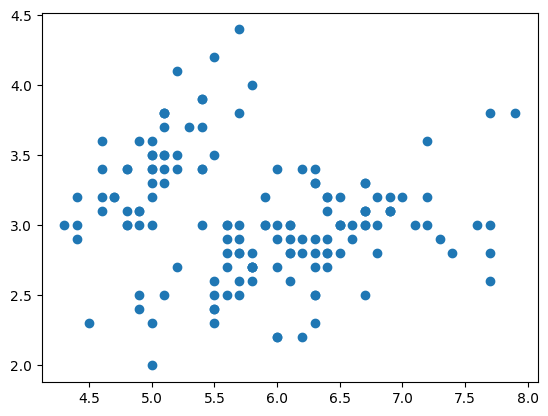

In [9]:
# Step 3: Store the data matrix in a variable called 'samples'
samples = iris.data

# Step 4: Extract features for plotting
# Column 0 → Sepal length
x = samples[:, 0]
# Column 1 → Sepal width
y = samples[:, 1]
# Putting the 2 columns together > creates a table with 2 columns for later use
sepal_length_width = np.array(list(zip(x, y)))
# Step 5: Create a scatter plot
# alpha=0.5 makes overlapping points more transparent
plt.scatter(x, y)

# Step 6: Display the scatter plot
plt.show()


# Implementing K-Means: Step 1 — Initialize Centroids

**K-Means recap**
1. Place *k* random centroids for the initial clusters.  
2. Assign each sample to the nearest centroid.  
3. Update centroids using the mean of assigned samples.  
4. Repeat steps 2–3 until convergence.

**Goal for this step:** Initialize the centroids.

- We expect **three clusters** (the three iris species), so set **\(k = 3\)**.
- Create **three random initial centroids** in the same feature space as the data (sepal length, sepal width, petal length, petal width).
- Plot these centroids on top of the scatter of samples to visually confirm their starting positions.

The k-means algorithm begins with the initialization of centroids, which serve as the starting points for the clusters.  

Since the Iris dataset is known to contain three species of flowers, we set \(k = 3\). In practice, however, the number of clusters is often unknown and must be determined through evaluation methods, which we will study later.  

For this step, we generate three random centroids using NumPy and place them within the feature space. These centroids act as the initial guesses for the cluster centers.  

Once initialized, we can plot these centroids along with the data samples to visualize the starting positions of the clusters before the iterative process of assignment and updating begins.  

**Why random initialization matters**
- Different random starts can lead to different local minima.  
- For reproducibility, fix a random seed when generating initial centroids (useful for teaching, debugging, and result comparisons).

**What to visualize**
- A 2D scatter of two chosen features (e.g., sepal length vs. sepal width).  
- Overlay the three initial centroids as distinct markers to see their starting locations relative to the data.


In [10]:
import numpy as np

Initial centroid x-coordinates: [7.49159194 7.61988204 7.55164393]
Initial centroid y-coordinates: [2.17079365 2.65766642 3.52220039]
Centroids array:
 [[7.49159194 2.17079365]
 [7.61988204 2.65766642]
 [7.55164393 3.52220039]]


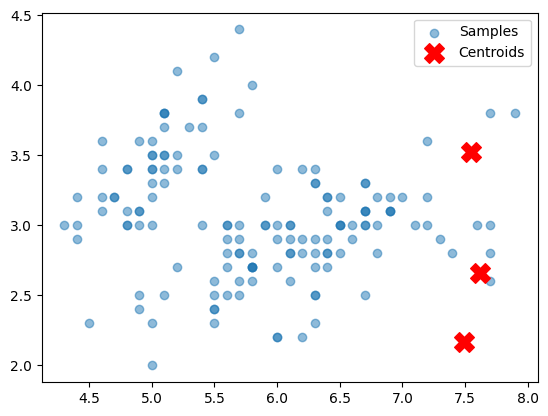

In [11]:
# Step 4: Define the number of clusters (k = 3, since there are 3 iris species)
k = 3

# Step 5: Randomly initialize centroids
# Generate k random x-coordinates within the range of sepal length
centroids_x = np.random.uniform(min(x), max(x), k)
# Generate k random y-coordinates within the range of sepal width
centroids_y = np.random.uniform(min(y), max(y), k)

# Step 6: Combine centroid coordinates into an array
# Each centroid is represented as (x, y)
# 1. zip(centroids_x, centroids_y) pairs each x-coordinate with its corresponding y-coordinate → iterator of tuples > <zip object at 0x...>
# 2. list(...) converts the iterator into a list of tuples, e.g. [(x1, y1), (x2, y2), (x3, y3)]
# 3. np.array(...) transforms the list into a 2D NumPy array for easy mathematical operations
centroids = np.array(list(zip(centroids_x, centroids_y)))

# Print centroids to verify initialization
print("Initial centroid x-coordinates:", centroids_x)
print("Initial centroid y-coordinates:", centroids_y)
print("Centroids array:\n", centroids)

# Step 7: Create scatter plots
# Plot the original data points
plt.scatter(x, y, alpha=0.5, label="Samples")
# Overlay the randomly initialized centroids
plt.scatter(centroids_x, centroids_y, color="red", marker="X", s=200, label="Centroids")

# Step 8: Display the plot with legend
plt.legend()
plt.show()

# Implementing K-Means: Step 2 — Assign Samples to Centroids

**K-Means recap**
1. Place *k* random centroids for the initial clusters.  
2. Assign each data sample to the nearest centroid.  
3. Update centroids using the mean of assigned samples.  
4. Repeat steps 2–3 until convergence.

**Goal for this step:** Assign each data point to the closest centroid.

**Distance formulas:**
- Euclidean distance  
The straight-line distance between two points \((x_1, y_1)\) and \((x_2, y_2)\):  

$$
d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}
$$  

- Taxicab (Manhattan) distance  
The distance measured along grid lines, like moving through city blocks:  

$$
d = |x_1 - x_2| + |y_1 - y_2|
$$  

For this exercise, we will use **Euclidean distance**.

**Process:**
1. Write a `distance()` function that calculates the Euclidean distance between a single sample from the sataset and a centroid.  
2. For each data point, compute its distance to all three centroids.  
3. Assign the point to the cluster corresponding to the nearest centroid (the index of the minimum distance).  

**Example:**  
If the distances to three centroids are:  

[15, 20, 5]

Then the point is closest to the 3rd centroid.  
The `argmin()` of this list would return index `2`, indicating cluster **2**.


In [12]:
# ✅ Checkpoint 1: Define a distance function (Euclidean)
def distance(a, b):
    one = (a[0] - b[0]) ** 2
    two = (a[1] - b[1]) ** 2
    return (one + two) ** 0.5

# ✅ Checkpoint 2: Create an array to hold cluster labels for each sample
labels = np.zeros(len(samples))

# ✅ Checkpoint 3: Function to assign one sample to the nearest centroid
def assign_to_centroid(sample, centroids):
    k_local = len(centroids)
    distances = np.zeros(k_local)
    # Compute distance from sample to each centroid
    for i in range(k_local):
        distances[i] = distance(sample, centroids[i])
    # Return index of centroid with smallest distance
    closest_centroid = np.argmin(distances)
    return closest_centroid

# ✅ Checkpoint 4: Loop through all samples and assign to nearest centroid
for i in range(len(samples)):
    labels[i] = assign_to_centroid(samples[i], centroids)

# ✅ Checkpoint 5: Print the cluster assignments for each sample
print("Cluster labels for all samples:\n", labels)

Cluster labels for all samples:
 [2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 0. 1. 0. 2. 0. 1. 0. 0. 2. 0. 1. 0. 2. 2. 0. 0. 0. 2. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 2. 2. 2. 0. 2. 0. 0. 2. 0. 0. 0. 2.
 0. 1. 0. 0. 2. 0. 1. 1. 1. 1. 0. 1. 0. 2. 2. 0. 1. 0. 0. 2. 1. 2. 1. 0.
 2. 0. 1. 0. 2. 2. 1. 2. 1. 1. 1. 2. 1. 1. 0. 1. 2. 2. 2. 2. 2. 2. 0. 2.
 2. 1. 0. 1. 2. 2.]


**How `assign_to_centroid` Works (Step-by-Step)**

1. **Initialize labels**  
   - Create an array `labels` of length equal to the number of samples (150).  
   - This will hold the cluster index (0, 1, or 2) for each sample.

2. **Loop over all samples**  
   - For each row `i` in the dataset, call the function `assign_to_centroid(samples[i], centroids)`.

3. **Inside `assign_to_centroid(sample, centroids)`**  
   - Set `k = len(centroids)` (here `k = 3`).  
   - Initialize an array `distances` of length `k`.  
   - For each centroid `j` from 0 to `k-1`, compute the Euclidean distance between the sample and `centroids[j]` and store it in `distances[j]`.

4. **Find the nearest centroid**  
   - Use `np.argmin(distances)` to get the index of the smallest distance.  
   - This index (0, 1, or 2) represents the nearest centroid.

5. **Assign the label**  
   - Return this index to the outer loop.  
   - Set `labels[i] = closest_centroid`, so sample `i` is assigned to its nearest cluster.

6. **Centroids remain fixed in this step**  
   - The centroids are not updated yet; this step only assigns samples to the nearest centroid.  
   - Updating centroids comes in the next stage of the k-means algorithm.


# Implementing K-Means: Step 3 — Update Centroids

**K-Means recap**
1. Place *k* random centroids for the initial clusters.  
2. Assign each data sample to the nearest centroid.  
3. Update centroids based on the points assigned to them.  
4. Repeat Steps 2–3 until convergence.

**Goal for this step:** Recalculate the position of each centroid.

- After assigning every sample to a cluster, each cluster may contain several points.  
- The **new centroid** of a cluster is computed as the **mean of all the points** assigned to it.  
- This ensures that centroids move toward the center of their cluster, making the algorithm gradually more accurate.

**Mathematical definition:**  
For cluster \( j \), with points \( x_1, x_2, \dots, x_m \), the updated centroid is given by:  

$$
\mu_j = \frac{1}{m} \sum_{i=1}^{m} x_i
$$

**Implementation idea:**  
- For each centroid \( j \):  
  - Select all samples where `labels == j`.  
  - Compute the mean across these samples using `.mean(axis=0)`.  
  - Update centroid \( j \) to this new value.

**Note:**  
- If a centroid has no points assigned, it can remain in place or be reinitialized randomly.  
- This update step is repeated along with reassignment until the centroids stabilize (convergence).


In [13]:
from copy import deepcopy

In [14]:
# ----------------------------
# Step 3: Update centroids
# ----------------------------

# Step 3.1: Save the old centroid positions (deep copy to avoid reference issues)
centroids_old = deepcopy(centroids)

# Step 3.2: For each cluster index i, collect points with label i

for i in range(k):
    # Collect all points whose assigned label equals i
    points = []
    for j in range(len(sepal_length_width)):
        if labels[j] == i:
          points.append(sepal_length_width[j])
# Step 3.3: Update centroid i to the mean of its assigned points (axis=0 for column-wise mean) 
    centroids[i] = np.mean(points, axis=0)  # mean along rows -> new (x, y)

# np.mean(points, axis=0) → averages column-wise, giving the mean x and mean y (correct new centroid).
# np.mean(points, axis=1) → averages row-wise, giving one number per point (not useful for centroids).
# np.mean(points)         → averages over all values into a single scalar (also not useful here).

# Step 3.4: Print before/after to observe the centroid movement
print(centroids_old)
print("- - - - - - - - - - - - - -")
print(centroids)

[[7.49159194 2.17079365]
 [7.61988204 2.65766642]
 [7.55164393 3.52220039]]
- - - - - - - - - - - - - -
[[5.66153846 2.55384615]
 [6.70344828 2.89310345]
 [5.62560976 3.35487805]]


**Step 3: Aggiornamento dei centroidi**

In the third step of the k-means algorithm, the goal is to update the position of the centroids based on the points assigned to them.

1. The main loop iterates over the range of `k` (the number of clusters).  
   For each value of `i` (the current cluster), an empty list `points` is initialized.

2. A second loop then iterates over the entire `sepal_length_width` dataset.  
   For each element `j`, the algorithm checks whether the label `labels[j]` matches the cluster `i`.  
   If the condition is true, the corresponding row `sepal_length_width[j]` is appended to the list `points`.

3. Once all points belonging to cluster `i` have been collected, the new centroid `centroids[i]` is computed as the mean of the values in `points`.  
   Concretely, this means calculating:
   - the average of the first column (`sepal_length_width[:, 0]` → sepal length),
   - and the average of the second column (`sepal_length_width[:, 1]` → sepal width).

As a result, each centroid moves to the mean position of the points assigned to it, representing the “true center” of that cluster.



# Implementing K-Means: Step 4 

In this step, we extend the k-means algorithm by repeating Steps 2 and 3 until the centroids no longer change, a point known as **convergence**.

**Algorithm Recap** 
1. Place *k* random centroids for the initial clusters.  
2. Assign each data sample to the nearest centroid.  
3. Update the centroids based on the points assigned to them.  
4. Repeat Steps 2 and 3 until convergence.  

**Step 4: Iterative Update **
- To achieve convergence, we enclose Steps 2 and 3 in a `while` loop.  
- The stopping condition is defined using an array called `errors`, which measures the change between the updated centroids (`centroids`) and the previous centroids (`centroids_old`).  
- If all entries in `errors` are equal to zero, this means that the centroids have stabilized and the algorithm has converged.  

This iterative process ensures that the algorithm continues refining cluster centers until no further movement occurs. Each centroid then represents the optimal mean position of its assigned cluster.


<p style="text-align: center; font-size: 16px;"><b>Complete process</b></p>

In [15]:
# Implementing K-Means: Step 1 to 4 — loop until convergence, with step-by-step comments
# From the beginning

# ------------------------------------------------------------
# Load and prepare data (Iris: use sepal length vs sepal width)
# ------------------------------------------------------------
iris = datasets.load_iris()
samples = iris.data
x = samples[:, 0]
y = samples[:, 1]
sepal_length_width = np.array(list(zip(x, y)))

# ------------------------------------------------------------
# Step 1 — Place K random centroids
# ------------------------------------------------------------
k = 3
centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)
centroids = np.array(list(zip(centroids_x, centroids_y)))

# ------------------------------------------------------------
# Utilities
# ------------------------------------------------------------
def distance(a, b):
    """Euclidean distance between 2D points a and b."""
    one = (a[0] - b[0]) ** 2
    two = (a[1] - b[1]) ** 2
    return (one + two) ** 0.5

def assign_to_centroid(sample, centroids):
    """Return index of the nearest centroid to a sample."""
    k_local = len(centroids)
    distances = np.zeros(k_local)
    for i in range(k_local):
        distances[i] = distance(sample, centroids[i])
    return int(np.argmin(distances))

# ------------------------------------------------------------
# Initialization for Step 4 (convergence loop)
# ------------------------------------------------------------
# Keep previous centroid positions here
centroids_old = np.zeros(centroids.shape)

# Cluster labels (0, 1, 2)
labels = np.zeros(len(samples), dtype=int)

# ✅ Checkpoint 1 — Initialize error and compute initial distances
error = np.zeros(3)
for i in range(k):
    error[i] = distance(centroids[i], centroids_old[i])

# ------------------------------------------------------------
# ✅ Checkpoint 2 — Repeat Steps 2 & 3 until convergence
# The loop stops when all entries in `error` are zero.
# ------------------------------------------------------------
while error.all() != 0:
    # Step 2 — Assign samples to nearest centroid
    for i in range(len(samples)):
        labels[i] = assign_to_centroid(samples[i], centroids)

    # Step 3 — Update centroids
    centroids_old = deepcopy(centroids)

    for i in range(k):
        # Collect all points that belong to cluster i
        points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
        # Update centroid i to the mean of its assigned points
        centroids[i] = np.mean(points, axis=0)
        # Recompute error for this centroid (new vs old)
        error[i] = distance(centroids[i], centroids_old[i])

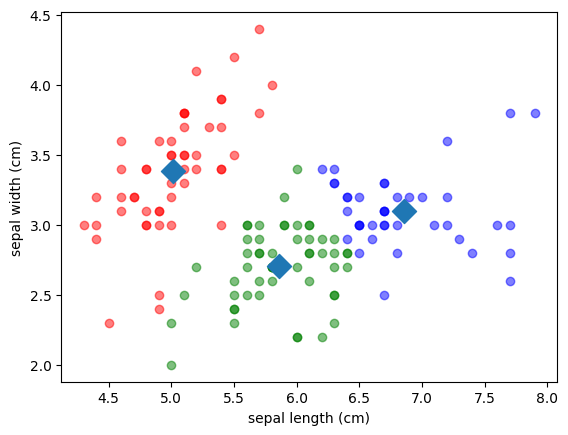

In [16]:
# ------------------------------------------------------------
# ✅ Checkpoint 3 — Visualize clustered points
# ------------------------------------------------------------
colors = ['r', 'g', 'b']

for i in range(k):
    points = np.array([sepal_length_width[j] for j in range(len(samples)) if labels[j] == i])
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

# ------------------------------------------------------------
# ✅ Checkpoint 4 — Plot centroids and labels
# ------------------------------------------------------------
plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

# Implementing K-Means: Scikit-Learn

Implementing k-means clustering from scratch is a great exercise, but in practice it can be time-consuming and prone to errors. A much more efficient and reliable approach is to use the scikit-learn library.  

Scikit-learn allows k-means to run on datasets with as many features as your computer can handle, making it easy to use all four features of the Iris dataset instead of only two.  

Another advantage is that scikit-learn is a widely used open-source library that is extensively tested, which greatly reduces the risk of mistakes. Because of its popularity, there is also a wealth of online resources and community support available if questions arise.  

To run k-means with scikit-learn, you start by importing `KMeans` from `sklearn.cluster`, then create a model specifying the number of clusters with the `n_clusters` argument. Once the model is defined, the `.fit()` method computes the clustering on the dataset, and the `.predict()` method assigns each sample to its closest cluster while also making the cluster centers available.  

This way, clustering can be performed quickly, accurately, and with minimal code.


In [17]:
# Implementing K-Means with scikit-learn — with step-by-step comments
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans   # ✅ Checkpoint 1: Import KMeans

# Load the Iris dataset
iris = datasets.load_iris()

# Extract the feature matrix (all 4 features of Iris)
samples = iris.data

# ✅ Checkpoint 2: Create a KMeans model instance to find 3 clusters
model = KMeans(n_clusters=3, random_state=0)

# ✅ Checkpoint 3: Fit the model to the data
model.fit(samples)

# ✅ Checkpoint 4: Predict the cluster labels for each sample
labels = model.predict(samples)

# Print the cluster labels
print(labels)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# New Data?

Once a k-means model has been trained, it can also be applied to classify new, unseen data points.  

This is done with the `.predict()` method, which assigns each new sample to the nearest cluster center that the model found during training.  

For example, if we collect three new Iris flowers with the measurements:  

[[5.1, 3.5, 1.4, 0.2],ù

[3.4, 3.1, 1.6, 0.3],

[4.9, 3.0, 1.4, 0.2]]


we can feed this new data into the fitted model.  

The model will then return the cluster labels for these samples, showing which cluster each flower belongs to.  

In this way, k-means is not only useful for analyzing the original dataset but also serves as a tool to classify new observations based on the patterns it has already learned.  


In [18]:
# ------------------------------------------------------------
# Create and fit a KMeans model with 3 clusters
# ------------------------------------------------------------
model = KMeans(n_clusters=3, random_state=0)
model.fit(samples)

# ------------------------------------------------------------
# ✅ Checkpoint 1: Store the new Iris measurements as a NumPy array
# ------------------------------------------------------------
new_samples = np.array([
    [5.7, 4.4, 1.5, 0.4],
    [6.5, 3.0, 5.5, 0.4],
    [5.8, 2.7, 5.1, 1.9]
])

# Test print to confirm shape and values
print("New samples:\n", new_samples)

# ------------------------------------------------------------
# ✅ Checkpoint 2: Predict labels for the new samples
# ------------------------------------------------------------
labels = model.predict(new_samples)
print("Predicted labels:", labels)

# ------------------------------------------------------------
# ✅ Checkpoint 3: Convert numerical labels to class names
# ------------------------------------------------------------
new_names = [iris.target_names[label] for label in labels]
print("Predicted class names:", new_names)


New samples:
 [[5.7 4.4 1.5 0.4]
 [6.5 3.  5.5 0.4]
 [5.8 2.7 5.1 1.9]]
Predicted labels: [1 0 0]
Predicted class names: [np.str_('versicolor'), np.str_('setosa'), np.str_('setosa')]


# Visualize After K-Means

After running k-means with scikit-learn, we can create a scatter plot to see the clusters.  

On the x-axis we place the sepal length, and on the y-axis the sepal width.  

By setting the parameter `c = labels` in the scatter plot, each point is colored according to the cluster it belongs to.  

Using `alpha = 0.5` makes the points slightly transparent, which helps when they overlap.  

Finally, we add axis labels for sepal length and sepal width so that the plot is clear and easy to interpret.  


Cluster labels for all samples:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


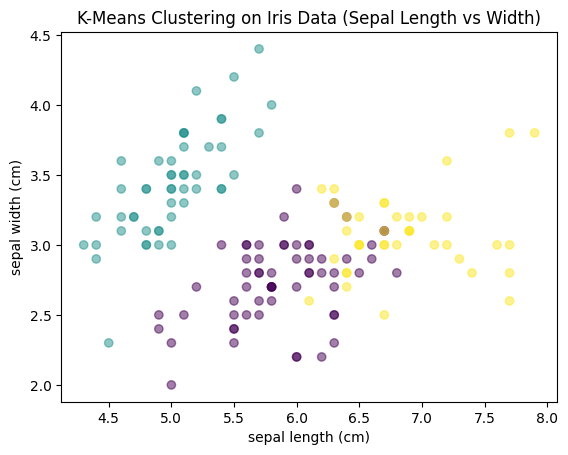

In [19]:
# Visualizing Iris data after K-Means clustering — with step-by-step comments
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

# ------------------------------------------------------------
# Load the Iris dataset and extract the feature matrix
# ------------------------------------------------------------
iris = datasets.load_iris()
samples = iris.data

# ------------------------------------------------------------
# Create and fit a KMeans model with 3 clusters
# ------------------------------------------------------------
model = KMeans(n_clusters=3, random_state=0)
model.fit(samples)

# ------------------------------------------------------------
# Predict labels for all samples
# ------------------------------------------------------------
labels = model.predict(samples)
print("Cluster labels for all samples:\n", labels)

# ------------------------------------------------------------
# ✅ Checkpoint 1: Extract feature columns for visualization
# x = sepal length, y = sepal width
# ------------------------------------------------------------
x = samples[:, 0]
y = samples[:, 1]

# ------------------------------------------------------------
# ✅ Checkpoint 2: Scatter plot with cluster colors
# Each point is colored according to its cluster label
# ------------------------------------------------------------
plt.scatter(x, y, c=labels, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('K-Means Clustering on Iris Data (Sepal Length vs Width)')
plt.show()


# Evaluation

At this stage, we have successfully clustered the Iris dataset into three groups, both with our own Python implementation and with scikit-learn.  

The natural question is whether these clusters actually match the biological species of the flowers.  

The Iris dataset provides true target values, where `0` represents Iris-setosa, `1` represents Iris-versicolor, and `2` represents Iris-virginica.  

By mapping these numerical targets to their species names, we can compare them directly with the cluster labels produced by k-means.  

To evaluate this comparison, we use a cross-tabulation, which shows how many flowers of each species fall into each cluster.  

The resulting table has the cluster labels in the rows and the species names in the columns, making it easy to see how well each cluster corresponds to a species.  

From the table, it becomes clear that Iris-setosa was identified with 100% accuracy, Iris-versicolor with very high accuracy, and Iris-virginica with lower accuracy, since some of its samples were grouped with versicolor.  

This evaluation demonstrates both the strengths and the limitations of the k-means clustering approach when applied to real data.  


In [20]:
import pandas as pd

# ------------------------------------------------------------
# Load the Iris dataset
# ------------------------------------------------------------
iris = datasets.load_iris()
samples = iris.data
target = iris.target

# ------------------------------------------------------------
# Fit KMeans with 3 clusters
# ------------------------------------------------------------
model = KMeans(n_clusters=3, random_state=0)
model.fit(samples)

# ------------------------------------------------------------
# ✅ Checkpoint 1: Build species list from true target values
# ------------------------------------------------------------
species = [iris.target_names[t] for t in list(target)]

# ------------------------------------------------------------
# ✅ Checkpoint 2: Create a DataFrame with cluster labels and species
# Note: Use numerical labels directly, not species names, for clarity
# ------------------------------------------------------------
labels = model.labels_
df = pd.DataFrame({'labels': labels, 'species': species})
print("DataFrame with assigned cluster labels and true species:\n")
print(df)

# ------------------------------------------------------------
# ✅ Checkpoint 3: Perform cross-tabulation to compare clusters vs species
# ------------------------------------------------------------
ct = pd.crosstab(df['labels'], df['species'])
print("\nCross-tabulation of clusters vs species:\n")
print(ct)


DataFrame with assigned cluster labels and true species:

     labels    species
0         1     setosa
1         1     setosa
2         1     setosa
3         1     setosa
4         1     setosa
..      ...        ...
145       2  virginica
146       0  virginica
147       2  virginica
148       2  virginica
149       0  virginica

[150 rows x 2 columns]

Cross-tabulation of clusters vs species:

species  setosa  versicolor  virginica
labels                                
0             0          47         14
1            50           0          0
2             0           3         36


# The number of Clusters

So far, we have grouped the Iris plants into three clusters, but what if we didn’t already know there are three species in the dataset?  

To answer this, we need to consider what makes a cluster “good.” A good cluster is one where the points are close together, and this compactness is measured by inertia. Inertia is defined as the sum of distances between each sample and the centroid of its assigned cluster. The smaller the inertia, the tighter the clustering, and the better the result.  

In scikit-learn, inertia can be checked using `model.inertia_`. If we compute models with different values of k and plot the inertia values, we will always see a decreasing curve. That’s because adding more clusters naturally reduces the distance between points and centroids.  

However, this is a trade-off. Too few clusters give high inertia, while too many clusters may create divisions that don’t add meaningful separation. The goal is to find a balance where inertia is low but the number of clusters remains small.  

To make this decision, we can use the elbow method, which looks for the point in the graph where inertia begins to decrease more slowly. This point is often referred to as the “elbow.” For the Iris dataset, the elbow occurs at three clusters, confirming that k = 3 is the optimal choice.  


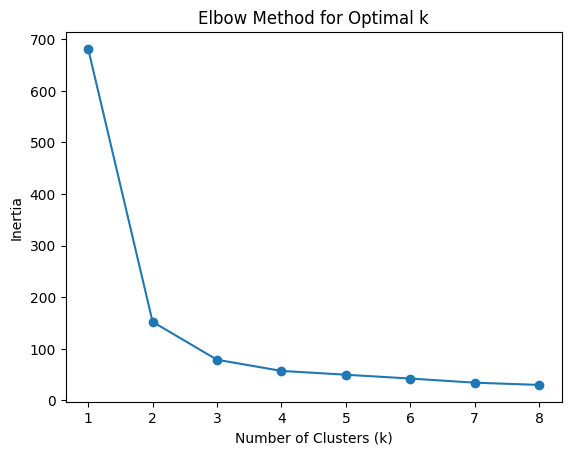

In [21]:
# ------------------------------------------------------------
# Load the Iris dataset
# ------------------------------------------------------------
iris = datasets.load_iris()
samples = iris.data

# ------------------------------------------------------------
# ✅ Checkpoint 1: Prepare lists for k values and inertia scores
# ------------------------------------------------------------
num_clusters = list(range(1, 9))   # k = 1 through 8
inertias = []                      # store inertia for each k

# ------------------------------------------------------------
# ✅ Checkpoint 2: Fit KMeans for each k and record inertia
# ------------------------------------------------------------
for k in num_clusters: 
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(samples)
    inertias.append(model.inertia_)

# ------------------------------------------------------------
# ✅ Checkpoint 3: Plot number of clusters vs inertia
# ------------------------------------------------------------
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
